In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

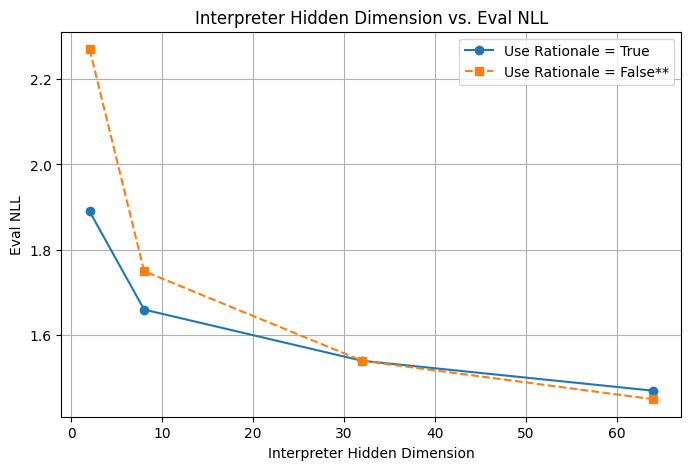

In [3]:

# Data extracted from the user's input
x_values = [2, 2, 8, 8, 32, 32, 64, 64]  # Sixth column values
y_true = [1.89, 1.66, 1.54, 1.47]  # Final numerical values where "True" is selected
y_false = [2.27, 1.75, 1.54, 1.45]  # Final numerical values where "False**" is selected

# Corresponding x-values for True and False
x_true = [2, 8, 32, 64]
x_false = [2, 8, 32, 64]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x_true, y_true, marker='o', linestyle='-', label="Use Rationale = True")
plt.plot(x_false, y_false, marker='s', linestyle='--', label="Use Rationale = False**")

# Labels and title
plt.xlabel("Interpreter Hidden Dimension")
plt.ylabel("Eval NLL")
plt.title("Interpreter Hidden Dimension vs. Eval NLL")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


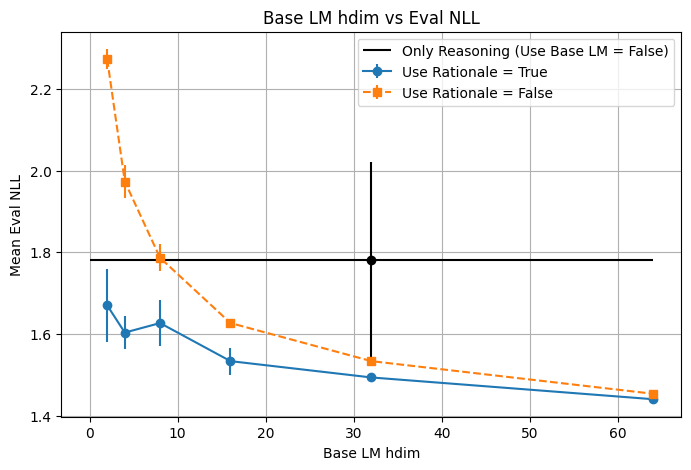

In [10]:
# Base lm hdim values
x_values = [2, 4, 8, 16, 32, 64]

# Eval NLL values (mean and range) for "True" in use_r
y_true_means = [np.mean([1.61, 1.68, 1.72]), 
                np.mean([1.58, 1.60, 1.63]), 
                np.mean([1.66, 1.59, 1.63]), 
                np.mean([1.54, 1.51, 1.55]), 
                np.mean([1.49, 1.50, 1.49]), 
                np.mean([1.44, 1.44, 1.44])]

y_true_errors = [np.std([1.61, 1.68, 1.72])*1.96,
                 np.std([1.58, 1.60, 1.63])*1.96,
                 np.std([1.66, 1.59, 1.63])*1.96,
                 np.std([1.54, 1.51, 1.55])*1.96,
                 np.std([1.49, 1.50, 1.49])*1.96,
                 np.std([1.44, 1.44, 1.44])*1.96]

# Eval NLL values (mean and range) for "False" in use_r
y_false_means = [np.mean([2.27, 2.29, 2.26]), 
                 np.mean([1.97, 2.00, 1.95]), 
                 np.mean([1.81, 1.77, 1.78]), 
                 np.mean([1.63, 1.63, 1.62]), 
                 np.mean([1.53, 1.54, 1.53]), 
                 np.mean([1.45, 1.45, 1.46])]

y_false_errors = [np.std([2.27, 2.29, 2.26])*1.96,
                  np.std([1.97, 2.00, 1.95])*1.96,
                  np.std([1.81, 1.77, 1.78])*1.96,
                  np.std([1.63, 1.63, 1.62])*1.96,
                  np.std([1.53, 1.54, 1.53])*1.96,
                  np.std([1.45, 1.45, 1.46])*1.96]

# Plot
plt.figure(figsize=(8, 5))
plt.errorbar(x_values, y_true_means, yerr=y_true_errors, marker='o', linestyle='-', label="Use Rationale = True")
plt.errorbar(x_values, y_false_means, yerr=y_false_errors, marker='s', linestyle='--', label="Use Rationale = False")
plt.hlines([np.mean([1.95, 1.73, 1.66])], xmin=0, xmax=64, colors=["black"], label="Only Reasoning (Use Base LM = False)")
plt.errorbar(x=32, y=np.mean([1.95, 1.73, 1.66]), yerr=np.std([1.95, 1.73, 1.66]) * 1.96, color='black', fmt='o')
# Labels and title
plt.xlabel("Base LM hdim")
plt.ylabel("Mean Eval NLL")
plt.title("Base LM hdim vs Eval NLL")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


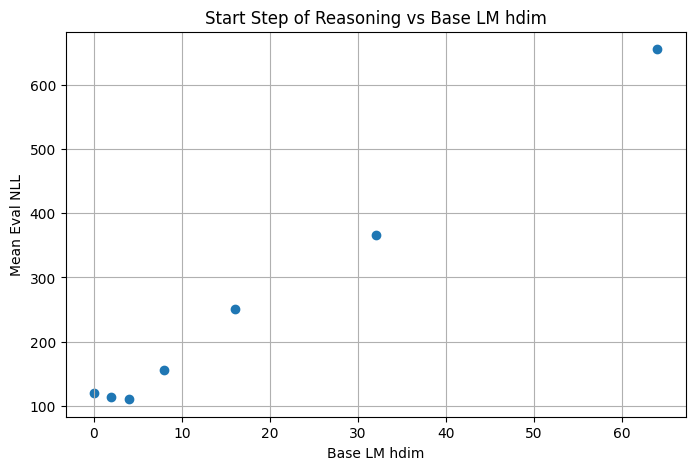

In [18]:
base_lm_hdim = [0, 2, 4, 8, 16, 32, 64]
reasoning_started = [119, 114, 110, 155, 251, 366, 656]

plt.figure(figsize=(8, 5))
plt.scatter(base_lm_hdim, reasoning_started)

plt.xlabel("Base LM hdim")
plt.ylabel("Mean Eval NLL")
plt.title("Start Step of Reasoning vs Base LM hdim")
# plt.legend()
plt.grid(True)
plt.show()

In [1]:
df = pd.read_csv("/nethome/jbjorner3/dev/hallucination-fun/quiet_star_replicate/scratch/wandb_export_2025-02-03T20_20_01.440-05_00.csv")
df = df[df["model_hidden_dim"] != 100]
df.columns

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'data_loader_batch_size', 'data_loader_num_workers', 'device', 'epochs',
       'info', 'interpreter_hidden_dim', 'model_hidden_dim', 'model_type',
       'node_name', 'output_dir', 'reasoner_hidden_dim', 'run_type', 'seq_len',
       'training_type', 'use_base_lm', 'use_reasoner', 'max_reasoning_len',
       'policy_loss_beta', 'trice_samples', 'experiment_logger',
       'n_tokens_ahead', 'base_lm_hidden_dim',
       'reasoner_interpreter_vocab_size', 'seed', 'auto_find_grad_acc',
       'debug_cfg', 'grad_acc', 'epoch', 'eval_loss', 'grad_norm', 'loss',
       'model_param_norm', 'nll_loss', 'quiet_star_policy_loss',
       'reasoning_entropy_max', 'reasoning_entropy_mean',
       'reasoning_entropy_min', 'step', 'sentence_reasoning_entropy_max',
       'sentence_reasoning_entropy_mean', 'sentence_reasoning_entropy_min'],
      dtype='object')

In [2]:
df.model_hidden_dim

0     1024
1       32
2       32
3       16
4        8
5        4
6        4
7        2
8        2
9      512
10     512
11     256
12     256
13     128
14     128
15      64
16      64
17      16
18       8
19     512
20     512
21     128
22     128
23      64
24      64
25      32
26      32
27      16
28      16
29       8
30       8
31       4
32       4
33       2
34       2
35    1024
Name: model_hidden_dim, dtype: int64

In [5]:
summary_df = df.groupby(["model_hidden_dim", "use_reasoner"]).aggregate({"nll_loss": ("mean", 'std'), "eval_loss": ('mean', 'std')})
summary_df

nll_loss           eval_loss          
                                   mean       std      mean       std
model_hidden_dim use_reasoner                                        
2                False         3.008070  0.018396  3.002512  0.020189
                 True          3.314054  0.004414  3.318630  0.000182
4                False         2.706575  0.085117  2.699896  0.091819
                 True          3.317022  0.014055  3.317222  0.000179
8                False         2.422708  0.036205  2.411140  0.021961
                 True          3.308453  0.011429  3.316045  0.000983
16               False         2.132929  0.006678  2.121622  0.005104
                 True          2.451995  0.064876  2.433707  0.060657
32               False         1.931178  0.048223  1.910427  0.046956
                 True          2.065715  0.064884  2.059891  0.054282
64               False         1.644049  0.056750  1.631196  0.000898
                 True          1.766038  0.088635  1.754168  0.043443
128              False         1.409572  0.024217  1.465908  0.002010
                 True          1.499667  0.034459  1.530833  0.011671
256              False         1.237484  0.006663  1.387767  0.003891
512              False         0.992667  0.014017  1.462614  0.002248
                 True          1.075115  0.004607  1.461828  0.001367
1024             False         0.513181       NaN  1.906242       NaN
                 True          0.706302       NaN  1.753591       NaN

In [26]:
summary_df.index

(np.int64(2), np.True_)

In [43]:
summary_df.index.levels[0]

Index([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], dtype='int64', name='model_hidden_dim')

In [49]:
summary_df.iloc[summary_df.index.isin([False], level=1)]['eval_loss', 'std'].tolist()

[0.020188803035882212,
 0.09181901711374278,
 0.021961318896375464,
 0.0051036881815627105,
 0.0469561114866863,
 0.0008983482206963281,
 0.002009763035380398,
 0.0038907942076954823,
 0.0022479021169392256,
 nan]

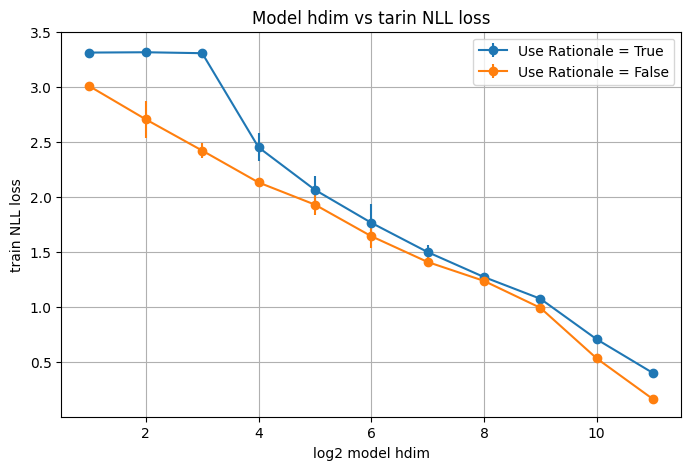

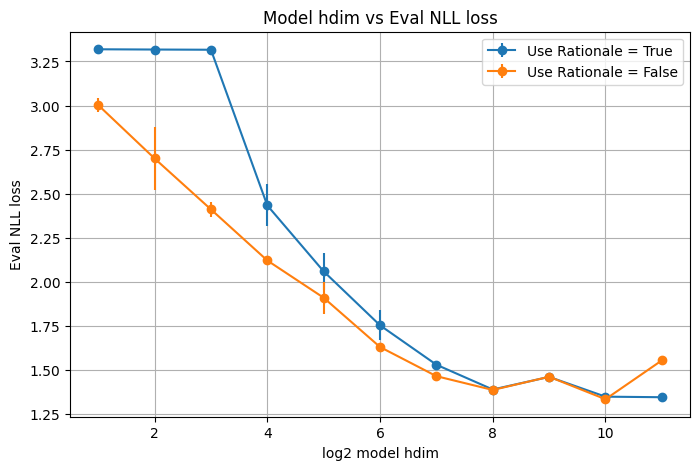

In [11]:
import matplotlib.pyplot as plt
import numpy as np
x_values_mean_nll_loss = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] # ['model_hidden_dim']
mean_nll_loss = np.array([3.3140543619791667, 3.317022196451823, 3.3084527587890626, 2.451995239257813, 2.065714823404948, 1.76603759765625, 1.4996669006347658, 1.272705, 1.0751153564453124, 0.7063019752502442, 0.39907])
std_err_nll_loss = np.array([0.004413662932699067, 0.014054811849280027, 0.011428624859827034, 0.06487595382841935, 0.06488357847429409, 0.0886346380961926, 0.034458867724088856, 0.005525, 0.004607300165665795, np.nan, np.nan]) * 1.96

x_values_mean_nll_loss_no_reason = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
mean_nll_loss_no_reason = np.array([3.0080696614583333, 2.706575012207031, 2.4227083333333335, 2.132928771972656, 1.9311780865987145, 1.6440488688151043, 1.4095716349283856, 1.2374836222330727, 0.9926668802897135, 0.53246, 0.1615])
std_err_nll_loss_no_reason = np.array([0.01839553713182061, 0.08511737456811053, 0.0362052712824818, 0.006678470479944419, 0.048223016923382586, 0.05675009538348527, 0.02421745777143612, 0.0066626457432235235, 0.014017335995500316, np.nan, np.nan]) * 1.96


plt.figure(figsize=(8, 5))
plt.errorbar(np.log2(x_values_mean_nll_loss), mean_nll_loss, yerr=std_err_nll_loss, marker='o', linestyle='-', label="Use Rationale = True")
plt.errorbar(np.log2(x_values_mean_nll_loss_no_reason), mean_nll_loss_no_reason, yerr=std_err_nll_loss_no_reason, marker='o', linestyle='-', label="Use Rationale = False")
# plt.errorbar(x_values, mean_nll_loss_rationale_false, yerr=std_err_nll_loss_rationale_false, marker='s', linestyle='--', label="Use Rationale = False")
# plt.hlines([np.mean([1.95, 1.73, 1.66])], xmin=0, xmax=64, colors=["black"], label="Only Reasoning (Use Base LM = False)")
# plt.errorbar(x=32, y=np.mean([1.95, 1.73, 1.66]), yerr=np.std([1.95, 1.73, 1.66]) * 1.96, color='black', fmt='o')
# Labels and title

plt.xlabel("log2 model hdim")
plt.ylabel("train NLL loss")
plt.title("Model hdim vs tarin NLL loss")
plt.legend()
plt.grid(True)

plt.figure(figsize=(8, 5))

x_values_mean_eval_loss = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] # ['model_hidden_dim']
mean_eval_loss = np.array([3.318629863752153, 3.3172217805952213, 3.316044944298938, 2.433706990886912, 2.0598906945142077, 1.7541676991021455, 1.530832564379126, 1.39035, 1.461827730338691, 1.3498, 1.34663])
std_err_eval_loss = np.array([0.00018194896119117814, 0.0001785795359843499, 0.0009834757575499407, 0.06065678898379384, 0.05428183649168612, 0.04344328750665044, 0.011670995212707659, 0.0013, 0.0013673920296932178, np.nan, np.nan]) * 1.96

x_values_mean_eval_loss_no_reason = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
mean_eval_loss_no_reason = np.array([3.0025120416547075, 2.699895812778057, 2.4111402404294635, 2.121621553440729, 1.9104271592009903, 1.631195663995228, 1.4659076257085966, 1.3877667187275762, 1.4626137594404778, 1.3353, 1.5554])
std_err_eval_loss_no_reason = np.array([0.020188803035882212, 0.09181901711374278, 0.021961318896375464, 0.0051036881815627105, 0.0469561114866863, 0.0008983482206963281, 0.002009763035380398, 0.0038907942076954823, 0.0022479021169392256, np.nan, np.nan]) * 1.96

plt.errorbar(np.log2(x_values_mean_eval_loss), mean_eval_loss, yerr=std_err_eval_loss, marker='o', linestyle='-', label="Use Rationale = True")
plt.errorbar(np.log2(x_values_mean_eval_loss_no_reason), mean_eval_loss_no_reason, yerr=std_err_eval_loss_no_reason, marker='o', linestyle='-', label="Use Rationale = False")

plt.xlabel("log2 model hdim")
plt.ylabel("Eval NLL loss")
plt.title("Model hdim vs Eval NLL loss")
plt.legend()
plt.grid(True)

In [33]:
df = pd.read_csv("/nethome/jbjorner3/dev/hallucination-fun/quiet_star_replicate/scratch/wandb_export_2025-02-04T10_34_30.855-05_00.csv")
df.columns
summary_df = df.groupby(["base_lm_hidden_dim", "use_reasoner"]).aggregate({"eval_loss": ["mean", "std"]})
summary_df

eval_loss          
                                     mean       std
base_lm_hidden_dim use_reasoner                    
32                 False         1.869651  0.005652
                   True          1.863618  0.007395
64                 False         1.647283  0.003761
                   True          1.645043  0.004788
100                False         1.523299  0.011812
                   True          1.531437  0.000827

In [34]:
summary_df[summary_df.index.isin([True], level=1)]['eval_loss', 'mean'].tolist()

[1.863617655786572, 1.6450430763849024, 1.5314373800319316]

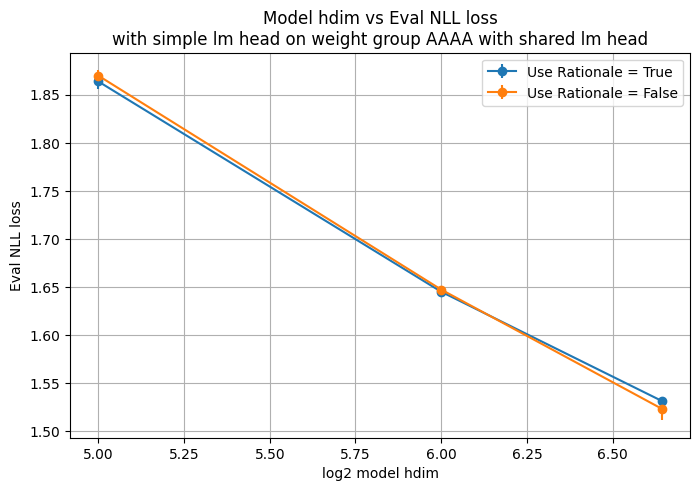

In [37]:
x_values = [32, 64, 100]
mean_eval_loss = summary_df[summary_df.index.isin([True], level=1)]['eval_loss', 'mean'].tolist()
std_err_eval_loss =summary_df[summary_df.index.isin([True], level=1)]['eval_loss', 'std'].tolist()

mean_eval_loss_no_reason = summary_df[summary_df.index.isin([False], level=1)]['eval_loss', 'mean'].tolist()
std_err_eval_loss_no_reason =summary_df[summary_df.index.isin([False], level=1)]['eval_loss', 'std'].tolist()

plt.figure(figsize=(8, 5))
plt.errorbar(np.log2(x_values), mean_eval_loss, yerr=std_err_eval_loss, marker='o', linestyle='-', label="Use Rationale = True")
plt.errorbar(np.log2(x_values), mean_eval_loss_no_reason, yerr=std_err_eval_loss_no_reason, marker='o', linestyle='-', label="Use Rationale = False")
# plt.errorbar(x_values, mean_nll_loss_rationale_false, yerr=std_err_nll_loss_rationale_false, marker='s', linestyle='--', label="Use Rationale = False")
# plt.hlines([np.mean([1.95, 1.73, 1.66])], xmin=0, xmax=64, colors=["black"], label="Only Reasoning (Use Base LM = False)")
# plt.errorbar(x=32, y=np.mean([1.95, 1.73, 1.66]), yerr=np.std([1.95, 1.73, 1.66]) * 1.96, color='black', fmt='o')
# Labels and title

plt.xlabel("log2 model hdim")
plt.ylabel("Eval NLL loss")
plt.title("Model hdim vs Eval NLL loss\nwith simple lm head on weight group AAAA with shared lm head")
plt.legend()
plt.grid(True)

In [10]:
df = pd.read_csv("wandb_export_2025-02-14T12_54_36.941-05_00.csv")
df.columns
df.groupby(["max_reasoning_len" ,"use_reasoner"]).aggregate({"eval_loss": ["mean", "std"], "nll_loss": ["mean", "std"], "loss": ['mean', 'std']})

eval_loss            nll_loss            \
                                    mean       std      mean       std   
max_reasoning_len use_reasoner                                           
5                 true          1.464461  0.002963  1.371767  0.040047   
10                ???           1.468151  0.006052       NaN       NaN   
                  true          1.462711  0.007525  1.379282  0.011256   
15                true          1.460022  0.002399  1.374760  0.047199   

                                    loss            
                                    mean       std  
max_reasoning_len use_reasoner                      
5                 true          1.371468  0.040034  
10                ???           1.394178  0.043798  
                  true          1.381506  0.015247  
15                true          1.362097  0.025621

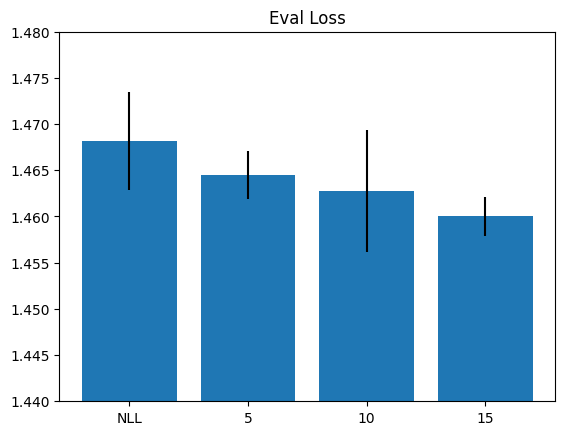

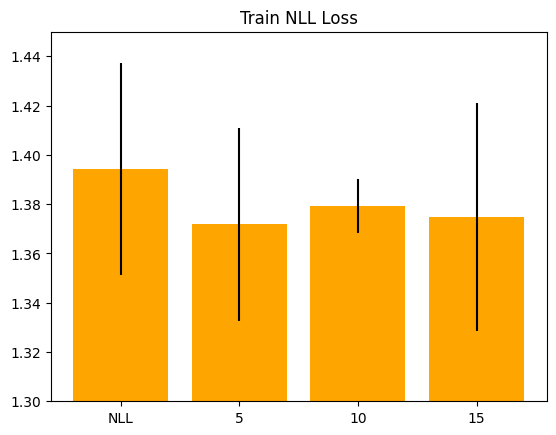

In [28]:
# I need to create 4 bars
plt.bar(x=["NLL", "5", "10", "15"], height=[1.468151, 1.464461, 1.462711, 1.460022], yerr=1.96 * np.array([0.006052,0.002963,0.007525,0.002399]) / np.sqrt(5))
plt.ylim(1.44, 1.48)
plt.title('Eval Loss')
plt.show()

plt.bar(x=["NLL", "5", "10", "15"], height=[1.394178, 1.371767, 1.379282, 1.374760], yerr=1.96 / np.sqrt(4) * np.array([0.043798, 0.040047, 0.011256, 0.047199]), color='orange')
plt.ylim(1.3, 1.45)
plt.title('Train NLL Loss')
plt.show()





In [7]:
df = pd.read_csv("wandb_export_2025-02-16T00_12_44.487-05_00.csv")

df.groupby(["training_type", "max_reasoning_len", "use_residual"]).aggregate({"nll_loss": ['mean', 'std'],
                                                                              "eval_loss": ['mean', 'std'],
                                                                              "loss": ['mean', 'std']})

nll_loss           eval_loss  \
                                                  mean       std      mean   
training_type max_reasoning_len use_residual                                 
nll           10                ???                NaN       NaN  1.468151   
quiet_starO   0                 false         1.405508  0.048467  1.481326   
                                true          1.376326  0.020744  1.471952   
              5                 false         1.368565  0.034606  1.461359   
                                true          1.365219  0.026824  1.471071   
              10                false         1.363411  0.038311  1.460084   
                                true          1.358386  0.023572  1.468427   
              15                false         1.361760  0.031405  1.463513   
                                true          1.358309  0.031083  1.467206   

                                                            loss            
                                                   std      mean       std  
training_type max_reasoning_len use_residual                                
nll           10                ???           0.006052  1.394178  0.043798  
quiet_starO   0                 false         0.008955  1.405508  0.048467  
                                true          0.006912  1.376326  0.020744  
              5                 false         0.006389  1.368377  0.034378  
                                true          0.005958  1.365166  0.027062  
              10                false         0.004664  1.363182  0.037758  
                                true          0.007342  1.358788  0.023165  
              15                false         0.004271  1.361406  0.031671  
                                true          0.006100  1.358384  0.030654

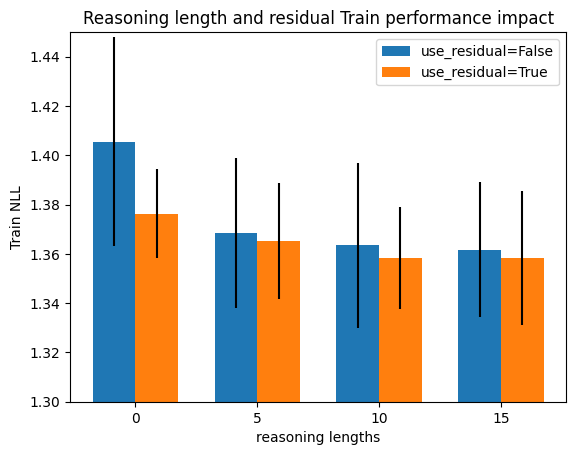

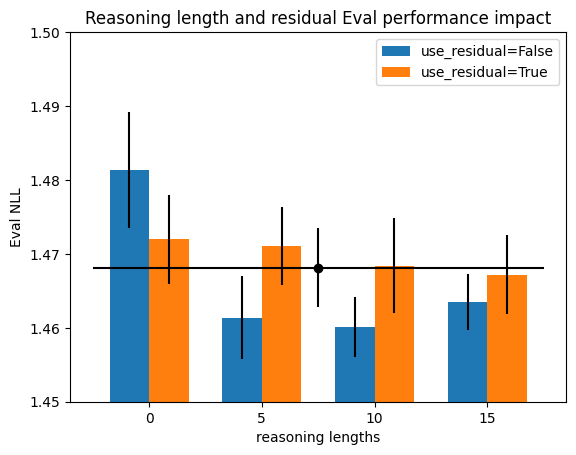

In [27]:
import matplotlib.pyplot as plt
import numpy as np
categories = ["0", "5", "10", "15"]
train_loss_means = np.array([1.405508, 1.376326, 1.368565, 1.365219, 1.363411, 1.358386, 1.361760, 1.358309])
train_loss_err = 1.96 / np.sqrt(5) * np.array([0.048467, 0.020744, 0.034606, 0.026824, 0.038311, 0.023572, 0.031405, 0.031083])


bar_width = 0.35
x = np.arange(len(categories))

plt.bar(x - bar_width/2, train_loss_means[::2], yerr=train_loss_err[::2], width=bar_width, label="use_residual=False")
plt.bar(x + bar_width/2, train_loss_means[1::2], yerr=train_loss_err[1::2], width=bar_width, label="use_residual=True")

plt.xticks(x, categories)  # Set x-axis labels
plt.xlabel("reasoning lengths")
plt.ylabel("Train NLL")
plt.title("Reasoning length and residual Train performance impact")
plt.legend()
plt.ylim(1.3, 1.45)
plt.show()



eval_loss_means = np.array([1.481326, 1.471952, 1.461359, 1.471071, 1.460084, 1.468427, 1.463513, 1.467206])
eval_loss_err = 1.96 / np.sqrt(5) * np.array([0.008955, 0.006912, 0.006389, 0.005958, 0.004664, 0.007342, 0.004271, 0.006100])


bar_width = 0.35
x = np.arange(len(categories))

plt.bar(x - bar_width/2, eval_loss_means[::2], yerr=eval_loss_err[::2], width=bar_width, label="use_residual=False")
plt.bar(x + bar_width/2, eval_loss_means[1::2], yerr=eval_loss_err[1::2], width=bar_width, label="use_residual=True")

plt.xticks(x, categories)  # Set x-axis labels
plt.xlabel("reasoning lengths")
plt.ylabel("Eval NLL")
plt.title("Reasoning length and residual Eval performance impact")
plt.legend()
plt.ylim(1.45, 1.5)
# 1.468151	0.006052
plt.hlines([1.468151], xmin=-0.5, xmax=3.5, colors=["black"], label="Only Reasoning (Use Base LM = False)")
plt.errorbar(x=1.5, y=1.468151, yerr=0.006052 / np.sqrt(5) * 1.96, color='black', fmt='o')
plt.show()

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/nethome/jbjorner3/dev/hallucination-fun/quiet_star_replicate/scratch/wandb_export_2025-02-17T16_14_25.948-05_00.csv")
print(df.columns)
def std_err(s):
    return 1.96 * np.std(s) / np.sqrt(len(s))
summary_df = df.groupby(["training_type", "max_reasoning_len", "policy_loss_beta", "trice_samples"]).aggregate({"nll_loss": [], "eval_loss": ['mean', std_err], "seed": ['count']})
summary_df


Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'data_loader_batch_size', 'data_loader_num_workers', 'device', 'epochs',
       'info', 'interpreter_hidden_dim', 'model_hidden_dim', 'model_type',
       'node_name', 'output_dir', 'reasoner_hidden_dim', 'run_type', 'seq_len',
       'training_type', 'use_base_lm', 'use_reasoner', 'max_reasoning_len',
       'policy_loss_beta', 'trice_samples', 'experiment_logger',
       'n_tokens_ahead', 'base_lm_hidden_dim',
       'reasoner_interpreter_vocab_size', 'seed', 'auto_find_grad_acc',
       'debug_cfg', 'grad_acc', 'share_lm_head', 'simple_lm_head',
       'weight_groups', 'model_n_head', 'model_n_layer',
       'add_last_context_token', 'use_residual',
       'add_surogate_loss_to_last_context_token', 'different_eot',
       'increment_pos_id_for_last_context_token', 'last_context_loss_beta',
       'dropout', 'train_nll_num', 'nll_loss_beta', 'epoch', 'eval_loss',
       'grad_norm', 'loss', 'model_

eval_loss  \
                                                                    mean   
training_type max_reasoning_len policy_loss_beta trice_samples             
nll           10                 1               10             1.470830   
quiet_starO   0                  1               2              1.483516   
              5                 -1               2              1.462818   
                                 0               2              1.461915   
                                 1               2              1.464535   
              30                 1               2              1.465157   
                                                 8              1.461137   

                                                                          seed  
                                                                 std_err count  
training_type max_reasoning_len policy_loss_beta trice_samples                  
nll           10                 1               10             0.003127    30  
quiet_starO   0                  1               2              0.003211    27  
              5                 -1               2              0.001829    30  
                                 0               2              0.001592    30  
                                 1               2              0.002126    29  
              30                 1               2              0.002200    30  
                                                 8              0.004701     6

In [ ]:
summary_df.eval_loss['mean'].to_list();


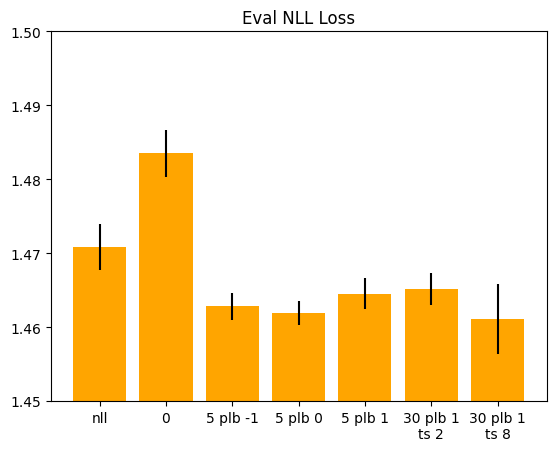

In [47]:
plt.bar(x=["nll", "0", "5 plb -1", "5 plb 0", "5 plb 1", "30 plb 1\nts 2", "30 plb 1\nts 8"], 
        height=[1.4708297548465603, 1.4835160541692578, 1.46281753230542, 1.4619149454425588, 1.4645345654565576, 1.4651574842509207, 1.4611372131978329], 
        yerr=[0.003127457705720136, 0.0032111318607643477, 0.0018292415745271614, 0.001592197741255811, 0.00212623580229847, 0.0021999516655037753, 0.004701039088435511], color='orange')
plt.ylim(1.45, 1.5)
plt.title('Eval NLL Loss')
plt.show()


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/nethome/jbjorner3/dev/hallucination-fun/quiet_star_replicate/scratch/wandb_export_2025-02-18T03_02_59.971-05_00.csv")
# print(df.columns)
def std_err(s):
    return 1.96 * np.std(s) / np.sqrt(len(s))
df = df[df['share_lm_head'] == True]
summary_df = df.groupby(["training_type","weight_groups", "policy_loss_beta"]).aggregate({"nll_loss": [], "eval_loss": ['mean', std_err], "seed": ['count']})
summary_df

eval_loss            seed
                                                      mean   std_err count
training_type weight_groups     policy_loss_beta                          
nll           ["A","B","C","D"]  1                1.873269  0.002232    10
quiet_starM   ["A","A","A","A"] -1                1.862118  0.002617    10
                                 0                1.863235  0.003144     9
                                 1                1.863364  0.002871    10
              ["A","A","A","B"] -1                1.862365  0.002527    10
                                 0                1.861516  0.002338    10
                                 1                1.859988  0.002287    10
              ["A","A","B","C"] -1                1.862875  0.002065    10
                                 0                1.862914  0.002102    10
                                 1                1.850934  0.005717    10
              ["A","B","A","C"] -1                1.862802  0.003713    10
                                 0                1.862957  0.003436    10
                                 1                1.837912  0.005708    10
              ["A","B","C","D"] -1                1.863341  0.003787    10
                                 0                1.863385  0.003624    10
                                 1                1.812642  0.006718    10

In [23]:
# summary_df.eval_loss['std_err'].to_list()

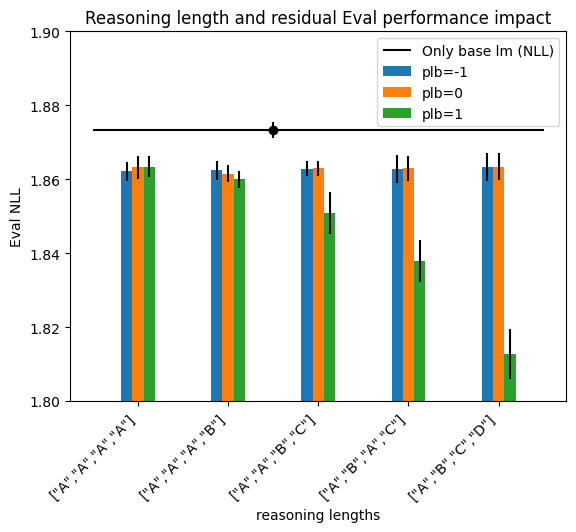

In [33]:

eval_loss_means = np.array([1.862117741931867, 1.8632348916226162, 1.8633644147800659, 1.8623646294892722, 1.8615163038847231, 1.8599880284200991, 1.8628746058992895, 1.8629143383144373, 1.8509339430028344, 1.8628017140858208, 1.862956677512378, 1.8379120538757536, 1.8633409677498924, 1.8633851288927956, 1.8126420836771673])
eval_loss_err = np.array([0.0026168602216877627, 0.003143972723507788, 0.0028707306245177263, 0.0025273561923686225, 0.002337778048925909, 0.0022872224747880906, 0.002065042511703594, 0.0021020199106731247, 0.005717312366292706, 0.003713268299790939, 0.003436487705107628, 0.005707799112429682, 0.003786842312363743, 0.0036244038822727696, 0.006717870058265908])


bar_width = 0.25
categories = [
    '["A","A","A","A"]',
    '["A","A","A","B"]',
    '["A","A","B","C"]',
    '["A","B","A","C"]',
    '["A","B","C","D"]'
]

x = np.arange(len(categories))

plt.bar(x - bar_width/2, eval_loss_means[::3], yerr=eval_loss_err[::3], width=bar_width/2, label="plb=-1")
plt.bar(x, eval_loss_means[1::3], yerr=eval_loss_err[1::3], width=bar_width/2, label="plb=0")
plt.bar(x + bar_width/2, eval_loss_means[2::3], yerr=eval_loss_err[2::3], width=bar_width/2, label="plb=1")

plt.xticks(x, categories, rotation=45, ha='right')  # Set x-axis labels
plt.xlabel("reasoning lengths")
plt.ylabel("Eval NLL")
plt.title("Reasoning length and residual Eval performance impact")
plt.ylim(1.8, 1.9)

plt.hlines([1.8732687038066878], xmin=-0.5, xmax=4.5, colors=["black"], label="Only base lm (NLL)")
plt.errorbar(x=1.5, y=1.8732687038066878, yerr=0.002232, color='black', fmt='o')
plt.legend()
plt.show()

In [1]:
# time the attention computation with gpt2 with the custom attention mask!
from quiet_star_replicate.model.model import CustomGPT2LMHeadModel, invert_and_maxfloat_attn_mask
from transformers import GPT2Config
import torch
model = CustomGPT2LMHeadModel(GPT2Config(vocab_size=9000 + 2,
                                                     n_embd=100,
                                                     n_layer=2,
                                                     n_head=5,
                                                     resid_pdrop=0, 
                                                     embd_pdrop=0, 
                                                     attn_pdrop=0,
                                                     n_positions=2 ** 14))
model.to('cuda');


In [ ]:
with torch.autograd.profiler.profile(use_device = 'cuda') as prof:
    seq_len = 2048 * 2
    input_ids = torch.arange(32 * seq_len, device='cuda').reshape(32, seq_len) % 9000
    attention_mask = torch.zeros((1,1,seq_len, seq_len), device='cuda') # b, h, q, k

    attention_mask = invert_and_maxfloat_attn_mask(attention_mask, dtype=torch.float32)
    outputs = model(input_ids=input_ids, attention_mask=None)
print(prof)

In [ ]:
for seq_len in range(1, 15):
    seq_len = 2 ** seq_len
    input_ids = torch.arange(32 * seq_len, device='cuda').reshape(32, seq_len) % 9000
    # attention_mask = torch.zeros((1,1,seq_len, seq_len), device='cuda') # b, h, q, k

    # attention_mask = invert_and_maxfloat_attn_mask(attention_mask, dtype=torch.float32)
    attention_mask = None
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    for _ in range(10):
        model(input_ids=input_ids, attention_mask=attention_mask)
    end.record()
    torch.cuda.synchronize()
    print(seq_len, start.elapsed_time(end))


2 327.84588623046875
4 11.383808135986328
8 11.788288116455078
16 11.560928344726562
32 11.354111671447754
64 11.942912101745605
128 16.17305564880371
256 31.142911911010742
512 64.27340698242188
1024 142.93299865722656
2048 346.13043212890625
4096 957.179931640625
8192 2962.109375
16384 10277.7294921875


In [4]:
128 * 12

1536

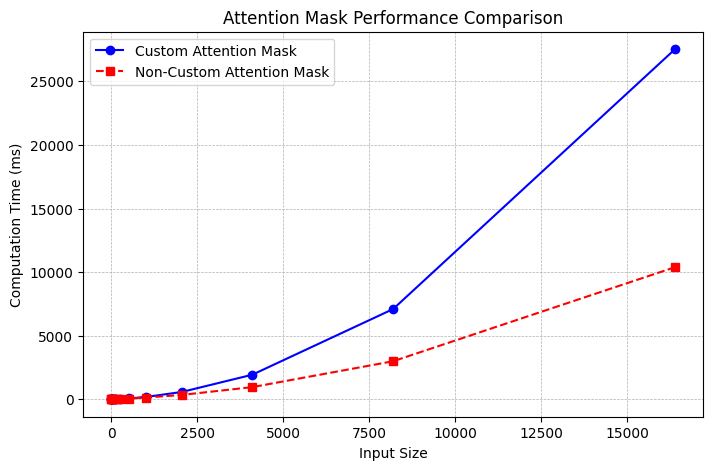

In [ ]:
import matplotlib.pyplot as plt

# Data points for custom attention mask
x = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
y_custom = [12.03699493408203, 12.471296310424805, 12.073984146118164, 12.338175773620605, 
            12.096511840820312, 12.676095962524414, 16.535551071166992, 32.86220932006836, 
            72.91596984863281, 194.0561981201172, 580.4441528320312, 1934.193603515625, 
            7098.06591796875, 27519.5078125]

# Data points for non-custom attention mask
y_non_custom = [11.23142433166504, 11.949055671691895, 11.744256019592285, 11.613183975219727, 
                12.07910442352295, 11.889663696289062, 16.150527954101562, 31.162368774414062, 
                64.5959701538086, 144.03482055664062, 348.8829345703125, 961.0045166015625, 
                2996.286376953125, 10387.8203125]

# Create plot
plt.figure(figsize=(8, 5))
plt.plot(x, y_custom, marker='o', linestyle='-', color='b', label="Custom Attention Mask")
plt.plot(x, y_non_custom, marker='s', linestyle='--', color='r', label="Non-Custom Attention Mask")
# plt.xscale('log', base=2)  # Log scale for x-axis
# plt.yscale('log')  # Log scale for y-axis
plt.xlabel("Input Size")
plt.ylabel("Computation Time (ms)")
plt.title("Attention Mask Performance Comparison")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/nethome/jbjorner3/dev/hallucination-fun/quiet_star_replicate/scratch/wandb_export_2025-02-28T12_35_07.301-05_00.csv")
df.columns
def std_err(s):
    return 1.96 * np.std(s) / np.sqrt(len(s))
summary_df = df.groupby("reasoner_hidden_dim").aggregate({"nll_loss": ['mean', std_err], "eval_loss": ['mean', std_err]})
summary_df

nll_loss           eval_loss          
                         mean   std_err      mean   std_err
reasoner_hidden_dim                                        
1                    1.370932  0.012904  1.434625  0.002559
32                   1.344941  0.013126  1.422550  0.001628
64                   1.329228  0.009670  1.418557  0.002590
128                  1.304721  0.017729  1.409083  0.003092
192                  1.268220  0.034031  1.406565  0.010203
256                  1.277152  0.029342  1.400506  0.004668
320                  1.288587  0.013995  1.399209  0.004468
512                  1.302631  0.025844  1.400000  0.004268
768                  1.340075  0.031844  1.415771  0.009579
1024                 1.407697  0.066371  1.444602  0.008412

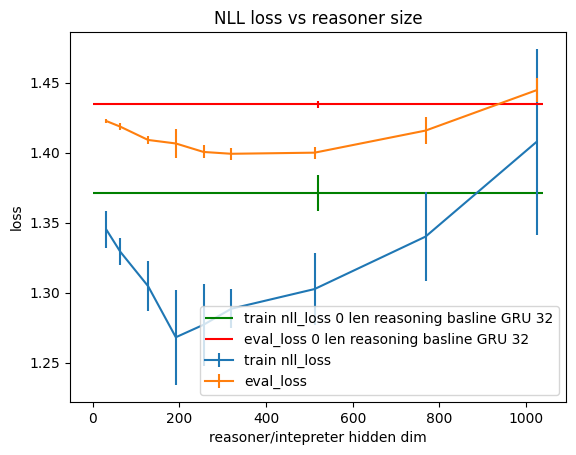

In [34]:
summary_df.index.values
xs = summary_df.index.values[1:]

plt.hlines(summary_df['nll_loss', 'mean'].values[:1], [0], [summary_df.index.values.max() + 16], colors=['green'], label="train nll_loss 0 len reasoning basline GRU 32")
plt.errorbar([(summary_df.index.values.max() + 16) / 2], y=summary_df['nll_loss', 'mean'].values[:1], yerr=summary_df['nll_loss', 'std_err'].values[:1], color="green")
plt.errorbar(xs, summary_df['nll_loss', 'mean'].values[1:], yerr=summary_df['nll_loss', 'std_err'].values[1:], label="train nll_loss")

plt.hlines(summary_df['eval_loss', 'mean'].values[:1], [0], [summary_df.index.values.max() + 16], colors=['red'],label="eval_loss 0 len reasoning basline GRU 32")
plt.errorbar([(summary_df.index.values.max() + 16) / 2], y=summary_df['eval_loss', 'mean'].values[:1], yerr=summary_df['eval_loss', 'std_err'].values[:1], color='red')
plt.errorbar(xs, summary_df['eval_loss', 'mean'].values[1:], yerr=summary_df['eval_loss', 'std_err'].values[1:], label="eval_loss")

plt.title("NLL loss vs reasoner size")
plt.legend()
plt.xlabel('reasoner/intepreter hidden dim')
plt.ylabel('loss')
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/nethome/jbjorner3/dev/hallucination-fun/quiet_star_replicate/scratch/wandb_export_2025-03-04T11_02_52.438-05_00.csv")

summary_df = df.groupby(["mix_interpeter_base_lm",'reasoner_hidden_dim', 'max_reasoning_len', "entropy_encouragement_coef"]).aggregate({"eval_loss": ['mean']})
summary_df


eval_loss
                                                                                             mean
mix_interpeter_base_lm reasoner_hidden_dim max_reasoning_len entropy_encouragement_coef          
1                      32                  0                 0                           1.549504
                                           10                0                           1.549894
                                                             1                           1.549264
                                                             4                           1.544765
                                                             16                          1.549368
...                                                                                           ...
2                      1024                10                1                           1.588653
                                                             4                           1.579106
                                                             16                          1.575138
                                                             64                          1.569879
                                                             128                         1.573132

[70 rows x 1 columns]

In [24]:
summary_df_subset_mix_1 = summary_df[summary_df.index.isin([1], level=0)]
# summary_df_subset_mix_1_and_10_reasoning = summary_df_subset_mix_1[summary_df_subset_mix_1.index.isin([10], level=2)]
# summary_df_subset_mix_1_and_10_reasoning
summary_df_subset_mix_1['eval_loss', 'mean'].values

summary_df_subset_mix_2 = summary_df[summary_df.index.isin([2], level=0)]
# summary_df_subset_mix_2_and_10_reasoning = summary_df_subset_mix_2[summary_df_subset_mix_2.index.isin([10], level=2)]
# summary_df_subset_mix_2_and_10_reasoning
summary_df_subset_mix_2['eval_loss', 'mean'].values


array([1.60259004, 1.59296988, 1.59797509, 1.59377348, 1.57911141,
       1.58724062, 1.58660523, 1.62885199, 1.62256204, 1.62539732,
       1.62346341, 1.55063595, 1.53989376, 1.54157598, 1.58589128,
       1.58521427, 1.58564936, 1.58493565, 1.58535022, 1.52791125,
       1.5280774 , 1.57949404, 1.57951711, 1.58133856, 1.58126115,
       1.55820258, 1.54796682, 1.53372769, 1.58198503, 1.59143501,
       1.5886526 , 1.57910616, 1.57513801, 1.56987889, 1.57313153])

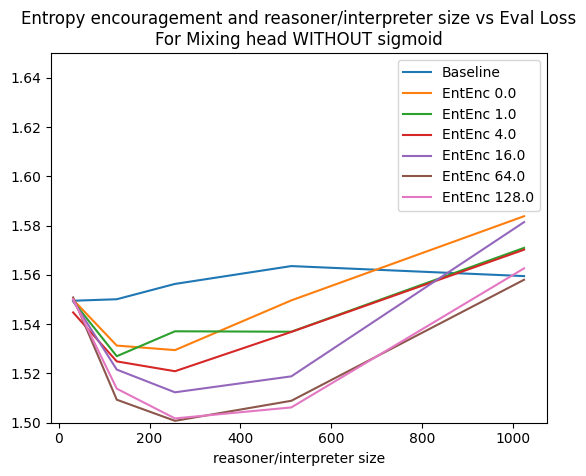

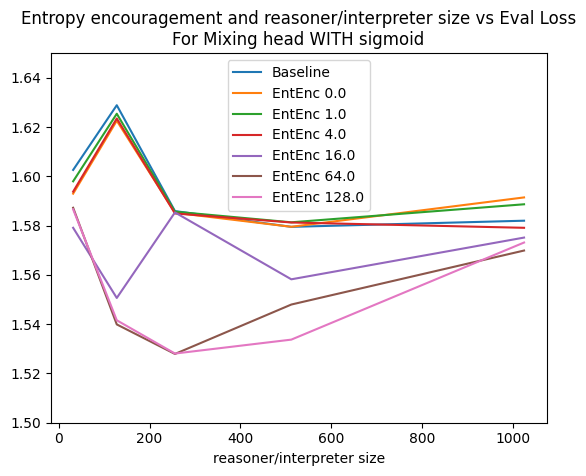

In [29]:
experiment_values = np.array(
      [1.54950448, 1.54989409, 1.54926411, 1.54476524, 1.54936812,
       1.55083248, 1.5501727 , 1.55011811, 1.53130796, 1.5269947 ,
       1.52488248, 1.52155645, 1.50933612, 1.51381939, 1.55633065,
       1.52947001, 1.53710691, 1.52089914, 1.51234495, 1.50077125,
       1.50174166, 1.56357417, 1.54965233, 1.53692327, 1.53685473,
       1.5188182 , 1.50890087, 1.50621188, 1.55950677, 1.58380837,
       1.57096004, 1.57022466, 1.581409  , 1.55802403, 1.56265056])
xs = [32, 128, 256, 512, 1024]
plt.plot(xs, experiment_values[0::7], label="Baseline")
plt.plot(xs, experiment_values[1::7], label="EntEnc 0.0")
plt.plot(xs, experiment_values[2::7], label="EntEnc 1.0")
plt.plot(xs, experiment_values[3::7], label="EntEnc 4.0")
plt.plot(xs, experiment_values[4::7], label="EntEnc 16.0")
plt.plot(xs, experiment_values[5::7], label="EntEnc 64.0")
plt.plot(xs, experiment_values[6::7], label="EntEnc 128.0")
plt.legend()
plt.title("Entropy encouragement and reasoner/interpreter size vs Eval Loss\nFor Mixing head WITHOUT sigmoid")
plt.ylim(1.5, 1.65)
plt.xlabel("reasoner/interpreter size")
plt.show()

experiment_values = np.array(
      [1.60259004, 1.59296988, 1.59797509, 1.59377348, 1.57911141,
       1.58724062, 1.58660523, 1.62885199, 1.62256204, 1.62539732,
       1.62346341, 1.55063595, 1.53989376, 1.54157598, 1.58589128,
       1.58521427, 1.58564936, 1.58493565, 1.58535022, 1.52791125,
       1.5280774 , 1.57949404, 1.57951711, 1.58133856, 1.58126115,
       1.55820258, 1.54796682, 1.53372769, 1.58198503, 1.59143501,
       1.5886526 , 1.57910616, 1.57513801, 1.56987889, 1.57313153])
xs = [32, 128, 256, 512, 1024]
plt.plot(xs, experiment_values[0::7], label="Baseline")
plt.plot(xs, experiment_values[1::7], label="EntEnc 0.0")
plt.plot(xs, experiment_values[2::7], label="EntEnc 1.0")
plt.plot(xs, experiment_values[3::7], label="EntEnc 4.0")
plt.plot(xs, experiment_values[4::7], label="EntEnc 16.0")
plt.plot(xs, experiment_values[5::7], label="EntEnc 64.0")
plt.plot(xs, experiment_values[6::7], label="EntEnc 128.0")
plt.legend()
plt.title("Entropy encouragement and reasoner/interpreter size vs Eval Loss\nFor Mixing head WITH sigmoid")
plt.ylim(1.5, 1.65)
plt.xlabel("reasoner/interpreter size")
plt.show()


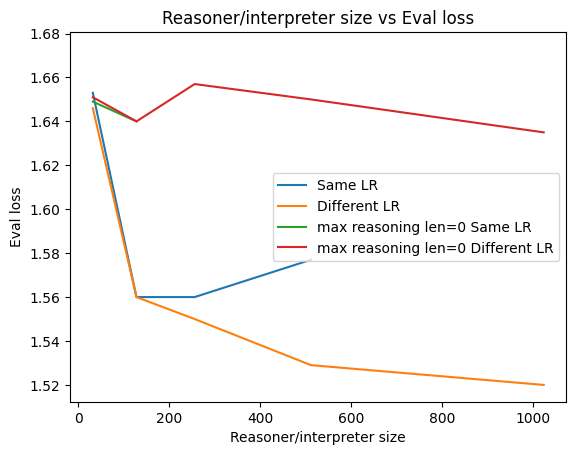

In [5]:
# changing the learning rate to solve the issue of models not learning when they are expanded.
import matplotlib.pyplot as plt
import numpy as np
xs = [32, 128, 256, 512, 1024]
eval_loss_means_same = [1.653, 1.56, 1.56, 1.577, np.nan]
eval_loss_means_same_baselines = [1.649, 1.640, np.nan, 1.673, np.nan]

eval_loss_means_diff = [1.646, 1.56, 1.55, 1.529, 1.520]
eval_loss_means_diff_baselines = [1.651, 1.640, 1.657, 1.65, 1.635]

plt.plot(xs, eval_loss_means_same, label="Same LR")
plt.plot(xs, eval_loss_means_diff, label="Different LR")
plt.plot(xs, eval_loss_means_same_baselines, label="max reasoning len=0 Same LR")
plt.plot(xs, eval_loss_means_diff_baselines, label="max reasoning len=0 Different LR")
plt.legend()
plt.title("Reasoner/interpreter size vs Eval loss")
plt.xlabel("Reasoner/interpreter size")
plt.ylabel("Eval loss")
plt.show()

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM


# tokenizer = AutoTokenizer.from_pretrained("Qwen/QwQ-32B")
# model = AutoModelForCausalLM.from_pretrained("Qwen/QwQ-32B", torch_dtype="auto", device_map='auto')

In [ ]:
tokenizer3B = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-3B")
model3B = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2.5-3B", torch_dtype="auto", device_map='auto')

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
tokenizer7B = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-7B")
model7B = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2.5-7B", torch_dtype="auto", device_map='auto')

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tokenizer72B = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-72B")
model72B = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2.5-72B", torch_dtype="auto", device_map='auto')

Loading checkpoint shards:   0%|          | 0/37 [00:00<?, ?it/s]

In [ ]:
prompt_long = """You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward pass: For a decoder only transformer mode, which is the style of language model that you are, a single forward pass consists of a finite number of layers. 
    1. Before any of the attention/mlp layers, the input tokens are encoded and combined with their positional information.
    2. In the attention layers each token communicates its representation to other tokens so that they may build a useful contextual representation from the rest of the tokens in the context.
    3. At the end of the transformer after all the layers have been passed through, the representation of the token at the end of the sequence is used to create a distribution over next tokens. 
A fundamental limitation to this process is that the the per token compute is limited by the number of layers. This is the reason you may need a variable length number of forward passes. Upon completing a forward pass you emit a distribution over tokens, this distribution is then sampled, and if contained within a thought, this sampled token can be attended to for your next forward, effectively caching the compute that forward pass did to be easily attended through the token's representation.
Here are some scenarios where you should use thinking:
Scenario 1: You are predicting the next tokens of a math text book:
"[Prior tokens explaining the concepts of Statistics]...
Q26 ...
A) 15
B) 20
C) 10
D) 5
...
(Answer to even numbered problems in the back of the book)
Q26<think> [Reason about the answer to the problem]... Suggestion that I expect A to be the answer, but I can't be too confident as my first attempt gave the answer as B, so I should adjust my distribution over tokens to reflect approximately a 75% confidence in A to a 25% confidence in B with a balance over other possible answer tokens to express some uncertainty in the answer being either of these two</think>B"
Here, we see thinking used to express distributional uncertainty over tokens. It can be inferred that the reasoning wasn't as successful as we may have wanted it to be because the true next token was not in fact A, but was instead B. This being said the reasoning over the next token still likely helped by reducing what would have likely been an uncertain prior in the likelihood over A, B, C, or D tokens given by your single forward pass computed distribution.
In Scenario 2 we reason about poem generation under specific constraints:
"User: Write a six line poem about squirrels playing koalas at soccer that meets the following constraints:In line 2, the last word should end with 'i'.
In line 3, the second word begins with 'u'.
In line 5, the second-to-last word is eucalyptus.
In the final line, each word has 2 syllables
Response:<think> Given the preceding user query, I expect the Response to be given by some extremely intelligent system, so let me craft my own prediction for a valid response, which should help me in modeling the distribution over possible valid responses. Let me first understand what the poem is about. It's a playful scenario where squirrels are competing against koalas in a game of soccer. That sounds fun and imaginative, so I should keep the tone light and whimsical.
Now, let's look at the constraints one by one.
First, in line 2, the last word should end with 'i'. So, I need a word that ends with 'i' to finish the second line. It could be a name, like 'Eli,' or a word like 'alibi,' but since it's a poem about animals playing soccer, maybe something more fitting like 'frisky' or 'whimsy.' Wait, actually, 'whimsy' ends with 'y', not 'i'. Let me think of words that end with 'i'. Maybe 'kiwi,' but that might not fit. Or 'origami,' but that seems out of place. Perhaps I can use a word like 'rally' or 'tally,' but those end with 'y', not 'i'. Wait, actually, 'rally' ends with 'y', but 'alibi' ends with 'i'. Hmm, maybe I can use a word like 'tie,' but that ends with 'e'. Wait, no, 'tie' ends with 'e', but 'Thai' ends with 'i', but that might not make sense in this context.
... [much more reasoning and trial and error] ...
In summary, I think the poem which meets these constraints may look like the following:
Squirrels face koalas at soccer
They roam the field, a swift safari
They unleash their secret plays
Koalas move in silent grace
They scurry under eucalyptus shade
Under moonlight creatures scatter

but I will keep all the uncertainty in mind from other poems I thought of to meet the constraints as I predict over the true tokens</think>Squirrels dash onto the pitch with bright, bushy tails
Koalas stand calmly, longing for chai
They unite in forest sport, squeaks echo near
Furry feet volley the ball, chasing sweet cheer
Between pounces, they nibble eucalyptus leaves
Final whistle offers joyful finish"
Although the true next tokens were substantially distinct from most likely any individual poem which was come up with during the thinking process, the planning ahead of the poem helped model the beginning and made the single forward pass of the model able to attend to various parts of the reasoning of valid tokens thought up as the tokens of the true poem were fed in auto regressively for distribution modeling.
Scenario 3: This scenario describes the most common case for your thoughts. Most of the time you shouldn't think. Many distributions of webtext are very easy to produce with a simple forward pass.
"How AP reported in all formats from tornado-stricken regionsMarch 8, 2012
When the first serious bout of tornadoes of 2012 blew through middle America in the middle of the night, they touched down in places hours from any AP bureau. Our closest video journalist was Chicago-based Robert Ray, who dropped his plans to travel to Georgia for Super Tuesday, booked several flights to the cities closest to the strikes and headed for the airport. He’d decide once there which flight to take.
He never got on board a plane. Instead, he ended up driving toward Harrisburg, Ill., where initial reports suggested a town was destroyed. That decision turned out to be a lucky break for the AP. Twice.
Ray was among the first journalists to arrive and he confirmed those reports -- in all formats. He shot powerful video, put victims on the phone with AP Radio and played back sound to an editor who transcribed the interviews and put the material on text wires. He then walked around the devastation with the Central Regional Desk on the line, talking to victims with the phone held so close that editors could transcribe his interviews in real time.
Ray also made a dramatic image of a young girl who found a man’s prosthetic <think>I will stick to my default forward pass distribution</think>leg in the rubble, propped it up next to her destroyed home and spray-painted an impromptu sign: “Found leg. Seriously.”"
Scenario 4: Here is another scenario were sticking to the default distribution would be appropriate:
"spotlight provides a convenient rechargeable LED light for work play and everyday life. <think>I will stick to my default forward pass distribution</think>choose from many vibrant colors to match your car, home, or personal style.
- high power 0.5 watt LED bulb (35+ lumens)
- colorful anodized aluminum body
- 180+ minutes of light per charge
- water resistant / submersible
- red glow â€˜chargingâ€™ indicator
- rechargeable Ni - MH battery
- shines 50 meter / 150 feet"
These scenarios are the most common. They have extremely high entropy following the beginning think token, and it is unlikely that any thought will modify the forward pass's distribution appropriately, so it is best not to produce a thought there."""

In [ ]:
import torch
torch.set_grad_enabled(False)
# some text from openwebmath maybe?
check_text = """"Good Morning America" and Parade magazine unveiled their lists of must-read books for the summer. From thrillers to biographies to light reading, these stories are un-put-downable.
If you're in search of that perfect page-turner for your summer vacation, look no further!
CLICK HERE for more hot summer book picks from Parade magazine.
CLICK HERE for our special books page full of book excerpts, author interviews and more!
Jack Reacher's latest adventure begins when he suspects a female suicide bomber is aboard a Manhattan subway car. Her death leads him on a path back to the war in Afghanistan against the Soviets in the 1980s.
After he's laid off in the latest budget cuts at The Los Angeles Times, reporter Jack McEvoy plans to write the murder story of his career in his last two weeks at the newspaper.
When Sandra Jones, a hardworking young wife and mother, disappears without a trace one day, Sgt. Det. D.D. Warren is called in on the case. As he's digging, he discovers that her family life isn't so perfect.
In Ridley Pearson's third crime novel starring Walt Fleming, the amiable sheriff in Sun Valley, Idaho, the lawman faces a master thief planning to steal three very expensive bottles of wine at the annual wine auction.
After Paul Madriani encounters Katia Solaz, a 26-year-old beauty from Costa Rica, it's a race to avoid disaster.
Gabriel Allon's perfect world is thrown into confusion with shocking news from London: The defector and former Russian intelligence officer Grigori Bulganov, who saved Gabriel's life in Moscow, has vanished without a trace.
After Shearman Waxx, the nation's premiere literary critic, tears apart the work of best-selling author Cullen Cubby Greenwich, Cubby and Waxx engage in all-out warfare.
Dallas lawyer Casey Jordan must deal with illegal immigrants and abuse of power in this legal thriller."""
# check_text = """Bayes and his Theorem

# My earlier post on Bayesian probability seems to have generated quite a lot of readers, so this lunchtime I thought I’d add a little bit of background. The previous discussion started from the result

# $P(B|AC) = K^{-1}P(B|C)P(A|BC) = K^{-1} P(AB|C)$

# where

# $K=P(A|C).$

# Although this is called Bayes’ theorem, the general form of it as stated here was actually first written down, not by Bayes but by Laplace. What Bayes’ did was derive the special case of this formula for “inverting” the binomial distribution. This distribution gives the probability of x successes in n independent “trials” each having the same probability of success, p; each “trial” has only two possible outcomes (“success” or “failure”). Trials like this are usually called Bernoulli trials, after Daniel Bernoulli. If we ask the question “what is the probability of exactly x successes from the possible n?”, the answer is given by the binomial distribution:

# $P_n(x|n,p)= C(n,x) p^x (1-p)^{n-x}$

# where

# $C(n,x)= n!/x!(n-x)!$

# is the number of distinct combinations of x objects that can be drawn from a pool of n.

# You can probably see immediately how this arises. The probability of x consecutive successes is p multiplied by itself x times, or px. The probability of (n-x) successive failures is similarly (1-p)n-x. The last two terms basically therefore tell us the probability that we have exactly x successes (since there must be n-x failures). The combinatorial factor in front takes account of the fact that the ordering of successes and failures doesn’t matter."""
def get_loss_per_token_for_model(model, tokenizer, text, return_logits=False):
    model_inputs = tokenizer([text], return_tensors="pt", add_special_tokens=False).to(model.device)
    correct_labels = model_inputs.input_ids[..., 1:]
    logits = model(**model_inputs).logits[..., :-1, :]
    criterion = torch.nn.CrossEntropyLoss(reduction='none')
    loss_per_token = criterion(logits.view(-1,logits.shape[-1]), correct_labels.view(-1))
    if return_logits:
        return loss_per_token, logits
    return loss_per_token
loss_per_token_for_model3B, logits_per_token_for_model3B = get_loss_per_token_for_model(model3B, tokenizer3B, check_text, return_logits=True)
entropy_per_token_for_model3B = torch.distributions.Categorical(logits=logits_per_token_for_model3B).entropy()[0].float().cpu().numpy()
loss_per_token_for_model72B = get_loss_per_token_for_model(model72B, tokenizer72B, check_text)
nll_differences = (loss_per_token_for_model3B - loss_per_token_for_model72B).float().cpu().numpy()



In [ ]:
import numpy as np
model_inputs = tokenizer3B(check_text, add_special_tokens=False).input_ids[1:]
model_input_vocabs = [tokenizer3B.decode(t) for t in model_inputs]
index_to_tokenid_and_nlldiff = list(zip(model_input_vocabs, model_inputs, nll_differences.tolist()))
interesting_token_indices = np.where(nll_differences > 6)[0].tolist()
for interesting_index in interesting_token_indices:
    print(interesting_index)
    print(index_to_tokenid_and_nlldiff[interesting_index -3: interesting_index + 3])
# interesting_tokens

229
[(' crime', 9778, -1.03125), (' novel', 11514, 0.01953125), (' starring', 39400, 0.046875), (' Walt', 35267, 7.65625), (' Fleming', 85197, 10.25), (',', 11, -0.19140625)]
230
[(' novel', 11514, 0.01953125), (' starring', 39400, 0.046875), (' Walt', 35267, 7.65625), (' Fleming', 85197, 10.25), (',', 11, -0.19140625), (' the', 279, 0.05859375)]
322
[(' Gr', 2825, 2.125), ('ig', 343, 0.06396484375), ('ori', 13601, 0.75390625), (' Bul', 13497, 8.6875), ('gan', 29428, 0.2412109375), ('ov', 859, 3.6875)]
345
[('ar', 277, 0.4375), ('man', 1515, -0.171875), (' Wax', 75742, 4.875), ('x', 87, 6.5625), (',', 11, 0.4921875), (' the', 279, 0.046875)]


array([-0.00439453,  0.125     ,  0.4375    , ...,  0.09765625,
        0.28125   , -0.90625   ], dtype=float32)

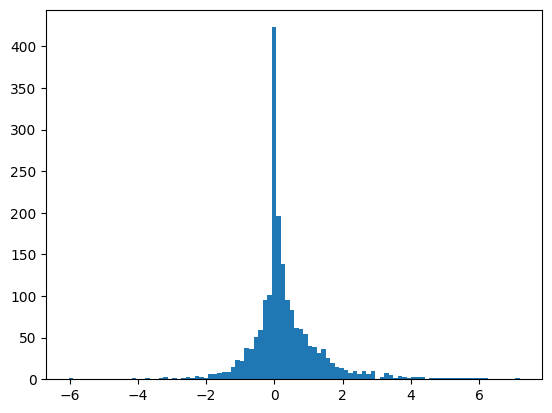

In [ ]:
import matplotlib.pyplot as plt
plt.hist(nll_differences, bins=100)
nll_differences

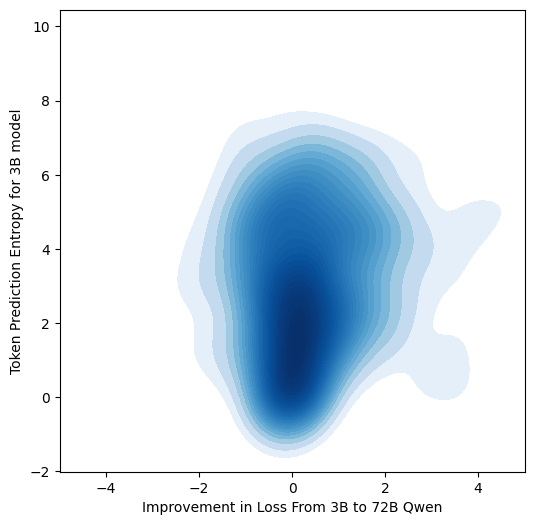

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

def create_kdepplot(x_vals, y_vals, x_label = "Improvement in Loss From 3B to 72B Qwen", y_label = "Original Token Prediction Loss", x_min=-5, x_max=5):
    # Create the density plot
    plt.figure(figsize=(6, 6))
    sns.kdeplot(x=x_vals, y=y_vals, fill=True, cmap="Blues", levels=30, norm=mcolors.LogNorm())

    # Labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(x_min,x_max)

    # Show plot
    plt.show()
# create_kdepplot(nll_differences, loss_per_token_for_model3B.float().cpu().numpy().tolist())
create_kdepplot(nll_differences, entropy_per_token_for_model3B, y_label="Token Prediction Entropy for 3B model")

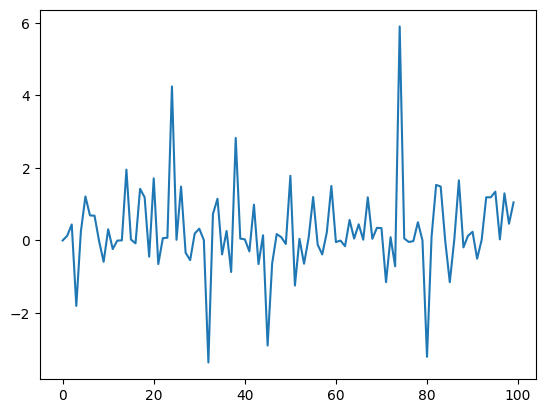

In [ ]:
plt.plot(nll_differences.tolist()[:100])

In [ ]:
# entropy ? - mean_y(sum p(y|x) * log(p(y|x)))

In [ ]:
prompt = prompt_long
# should think:
webtext_to_complete = """Webtext:{"question": "Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?", "answer": "Natalia sold 48/2 = <<48/2=24>>24 clips in May.\nNatalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.\n#### 72"}
{"question": "Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?", "answer": """ 
# webtext_to_complete = """Suppose an object is at a distance of only -10 cm from a
# base-down prism having a power of 6. If the prism is worn
# at a distance of 25 mm from the center of rotation of the
# eye, what is the effective power of that prism?
# Answer:"""

# shouldn't think
# webtext_to_complete = """Suppose an object is at a distance of only -10 cm from a
# base-down prism having a power of 6. If the prism is worn
# at a distance of 25 mm from the center of rotation of the
# eye, what is the effective power of"""
# webtext_to_complete = """"Good Morning America" and Parade magazine unveiled their lists of must-read books for the summer. From thrillers to biographies to light reading, these stories are un-put-downable.
# If you're in search of that perfect page-turner for your summer vacation, look no further!
# CLICK HERE for more hot summer book picks from"""
def check_webtext_for_thought(model, tokenizer, webtext_to_complete, max_new_tokens=30):
    assistant_to_complete = webtext_to_complete + " <think>"
    # messages = [
    #     {"role": "user", "content": prompt},
    #     {"role": "assistant", "content": assistant_to_complete},
    # ]

    # text = tokenizer.apply_chat_template(
    #     messages,
    #     tokenize=False,
    #     continue_final_message=True
    #     # add_generation_prompt=True
    # )

    model_inputs = tokenizer([prompt + "\n" + assistant_to_complete], return_tensors="pt", add_special_tokens=False).to(model.device)

    generated_ids = model.generate(
        **model_inputs,
        max_new_tokens=max_new_tokens,
        # temperature=0.6,
        # top_k=40,
        # top_p=0.95,
        # repetition_penalty=1.0,
        eos_token_id=tokenizer.eos_token_id,
        do_sample=True,
    )
    generated_ids_filtered = [
        output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
    ]

    response = tokenizer.batch_decode(generated_ids_filtered, skip_special_tokens=False)[0]
    # print(response)
    print(tokenizer.batch_decode(generated_ids)[0])
    return generated_ids
# check_webtext_for_thought(model7B, tokenizer7B, webtext_to_complete, max_new_tokens=50);
check_webtext_for_thought(model72B, tokenizer72B, webtext_to_complete, max_new_tokens=200);
# model_inputs.input_ids
# [(tokenizer.decode(t), t.item()) for t in model_inputs.input_ids[0]]

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

In [ ]:
print(webtext_to_complete)
for i in range(len(webtext_to_complete), 0, -5):
    print()
    # print(webtext_to_complete)
    check_webtext_for_thought(model7B, tokenizer7B, webtext_to_complete)

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


"Good Morning America" and Parade magazine unveiled their lists of must-read books for the summer. From thrillers to biographies to light reading, these stories are un-put-downable.
If you're in search of that perfect page-turner for your summer vacation, look no further!
CLICK HERE for more hot summer book picks from



Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


You are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.
Here are some definitions useful for understanding the task of language modeling conceptually:
- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => ['Hello', ',', 'world', '.', 'What', 'is', 'up', 'Dog', 'gie', '?']. Doggie represents one word but is broken into two tokens because of it's uniqueness in the training corpus for the tokenizer.
- Forward

KeyboardInterrupt: 

In [ ]:
[(t, tokenizer.decode(t)) for t in (tokenizer(prompt + "\n" + assistant_to_complete).input_ids)[-10:]]

[(67905, ' Cobb'),
 (646, ' can'),
 (3291, ' tell'),
 (498, ' you'),
 (13, '.'),
 (62547, ' Personally'),
 (13708, '<th'),
 (766, 'ink'),
 (65828, '>I'),
 (686, ' will')]

In [ ]:
tokenizer(text)

'<|im_start|>user\nYou are a state of the art pretrained language model. Your job is to predict the next token. I am giving you the ability to think for a variable number of forward passes before producing a distirbution over your next token predictions.\nHere are some definitions useful for understanding the task of language modeling conceptually:\n- Token: A single unit of prediction. Commonly a BPE (Byte-pair-Encoding) tokenizer is used, which first splits up a sentence into pretokens consisting of words and punctuation, then these pretokens are split into strings of continuous characters. The exact choice of which characters is determined by the most commonly coocuring continuous characters. Here is an example: "Hello, world. What is up Doggie?": 9707, 11, 1879, 13, 3555, 374, 705, 14254, 21512, 30 => [\'Hello\', \',\', \'world\', \'.\', \'What\', \'is\', \'up\', \'Dog\', \'gie\', \'?\']. Doggie represents one word but is broken into two tokens because of it\'s uniqueness in the tr

In [ ]:
tokenizer.tokenize("10 + 20 = 30")

['1', '0', 'Ġ+', 'Ġ', '2', '0', 'Ġ=', 'Ġ', '3', '0']

In [ ]:
print([(tokenizer.decode(t), t.item()) for t in model_inputs.input_ids[0]])

[('<|im_start|>', 151644), ('system', 8948), ('\n', 198), ('You', 2610), (' are', 525), (' a', 264), (' helpful', 10950), (' assistant', 17847), ('.', 13), ('<|im_end|>', 151645), ('\n', 198), ('<|im_start|>', 151644), ('user', 872), ('\n', 198), ('You', 2610), (' are', 525), (' a', 264), (' state', 1584), (' of', 315), (' the', 279), (' art', 1947), (' pretrained', 80669), (' language', 4128), (' model', 1614), ('.', 13), (' Your', 4615), (' job', 2618), (' is', 374), (' to', 311), (' predict', 7023), (' the', 279), (' next', 1790), (' token', 3950), ('.', 13), (' I', 358), (' am', 1079), (' giving', 7086), (' you', 498), (' the', 279), (' ability', 5726), (' to', 311), (' think', 1744), (' for', 369), (' a', 264), (' variable', 3890), (' number', 1372), (' of', 315), (' forward', 4637), (' passes', 16211), (' before', 1573), (' producing', 17387), (' a', 264), (' dist', 1582), ('ir', 404), ('b', 65), ('ution', 1488), (' over', 916), (' your', 697), (' next', 1790), (' token', 3950), 

In [ ]:

prompt = "How many r's are in the word \"strawberry\""
messages = [
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True
)

model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=10
)
generated_ids = [
    output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
]

response = tokenizer.batch_decode(generated_ids, skip_special_tokens=False)[0]
print(response)

Okay, so I need to figure out how many


In [ ]:
tokenizer.batch_decode(model_inputs.input_ids)

['<|im_start|>user\nHow many r\'s are in the word "strawberry"<|im_end|>\n<|im_start|>assistant\n<think>\n']

In [ ]:
"""TRIBE CHIEF TRIS DAZZLES AT DISH, FLUBS IN FIELD IN SIXTH STRAIGHT TIGER WIN
By Calvin J. Butterworth
June 19, 1924
Ty Cobb can tell you. Personally causing your team's loss when you are managing said team can be a devastating turn of events. Players who look to you for leadership and support are left in a rudderless abyss and often need to find dry morning land on their own.
Such was the case at Navin Field today, as the suddenly resurgent Indians re-visited our neighborhood, fresh from taking three of four from the Yankees and before that, four straight from Boston. It was their misfortune, though, to run into the Earl of Whitehill, who has been spinning masterpieces of hurling lately. Skipper Speaker doubled off him with two outs in the 1st, but Riggs Stephenson, back from an ailment, left him there with a short fly. Joe Sewell and Speaker singled with two outs again two innings later, but this time Riggs grounded out.
Meanwhile Harry Heilman, hero of yesterday, was stranding runners aplenty for our side, failing after three straight Fred Haney hits off Joe Shaute. The game remained scoreless through the first six frames, a remarkable achievement when one considers the power of these clubs' collective clout."""

In [ ]:
tokenizer("</think>", return_tensors='pt') # .to('cuda')
# len(tokenizer.vocab) # 151667, 151668 # second to last and last tokens.
# sorted(tokenizer.vocab.items(), key=lambda x: x[1])[-100:]

[('ðĿķ¡', 151569),
 ('ðĿķ±', 151570),
 ('ðĿĸĸ', 151571),
 ('ðĿĺı', 151572),
 ('ðĿĺĲ', 151573),
 ('ðĿĺļ', 151574),
 ('ðĿĻ®', 151575),
 ('ðĿĻ°', 151576),
 ('ðĿĻ¸', 151577),
 ('ðĿĻº', 151578),
 ('ðĿĻ¼', 151579),
 ('ðĿĻ½', 151580),
 ('ðĿĻ¿', 151581),
 ('ðĿļĦ', 151582),
 ('ðĿļı', 151583),
 ('ðŁħħ', 151584),
 ('ðŁħĵ', 151585),
 ('ÆĪ', 151586),
 ('àłĮ', 151587),
 ('áĻ³', 151588),
 ('áļĮ', 151589),
 ('áĽħ', 151590),
 ('áĽĲ', 151591),
 ('á¤Ĭ', 151592),
 ('á¸Ĭ', 151593),
 ('âĶ½', 151594),
 ('âķĬ', 151595),
 ('âĽĩ', 151596),
 ('âĽı', 151597),
 ('âĿª', 151598),
 ('âĿ«', 151599),
 ('âŁ°', 151600),
 ('ãĦį', 151601),
 ('ãĦĵ', 151602),
 ('ãĦ§', 151603),
 ('ãħĸ', 151604),
 ('ãī«', 151605),
 ('ê¦Ķ', 151606),
 ('ï±Ĭ', 151607),
 ('àºĤ', 151608),
 ('áħ£', 151609),
 ('á¥Ķ', 151610),
 ('á¥¤', 151611),
 ('âĨ¤', 151612),
 ('âĨ·', 151613),
 ('âĩŀ', 151614),
 ('âĸ¤', 151615),
 ('âŀ¶', 151616),
 ('ãĪ¼', 151617),
 ('ï¨·', 151618),
 ('ðĵı§', 151619),
 ('âĶ²', 151620),
 ('âĢ´', 151621),
 ('âĴŁ', 151622),
 ('âĴ¡', 15

In [ ]:
model.generate(**inputs)

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
/coc/flash9/jbjorner3/miniforge3/envs/quiet-star-replicate-v1/lib/python3.12/site-packages/transformers/generation/utils.py:2137: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


tensor([[151646,  14990,   1052,     13,    358,   2776,   4460,    311,   7071,
            700,   1246,    311,    990,    279,   1565,  12882,   7585,     63,
           3210,     13,    358,   3003,   6617]])

In [ ]:
import torch
out = torch.tensor([[151646,  14990,   1052,     13,    358,   2776,   4460,    311,   7071,
            700,   1246,    311,    990,    279,   1565,  12882,   7585,     63,
           3210,     13,    358,   3003,   6617]])


In [ ]:
tokenizer.batch_decode(out)

["<｜begin▁of▁sentence｜>hello there. I'm trying to figure out how to use the `git reset` command. I've heard"]

In [ ]:
tokenizer.tokenize("""Hello, world. What is up Doggie?""")

['Hello', ',', 'Ġworld', '.', 'ĠWhat', 'Ġis', 'Ġup', 'ĠDog', 'gie', '?']